
In computer Science, problems are divided into classes known as *Complexity Classes*; which are sets of problems with related complexity. 
- ***Polynomial (P)***: The class of problems *solved* in polynomial time, $O(n^k)$ for some constant $k$.
- ***Non-deterministic Polynomal (NP)***: The class of problems *verifiable* in polynomial time; and are *solvable* by non-deterministic machines (quantum computers) in polynomial time.
- ***Non-deterministic Polynomal-Hard (NP-Hard)***: A computational problem $H$ is called *NP-hard* if, for every problem $L$ which can be solved in non-deterministic polynomial-time, there is a ***polynomial-time reduction***(a method for solving one problem using another) from $L$ to $H$. That is, assuming a solution for $H$ takes 1 unit time, $H$ 's solution can be used to solve $L$ in polynomial time.
    - As a consequence, finding a polynomial time algorithm to solve a single *NP-hard* problem would give polynomial time algorithms for all the problems in the complexity class *NP*.
- ***Non-deterministic Polynomal-Complete (NP-Complete)***: This class of problems which are both *NP* and *NP-hard* (Hardest problems in *NP*).

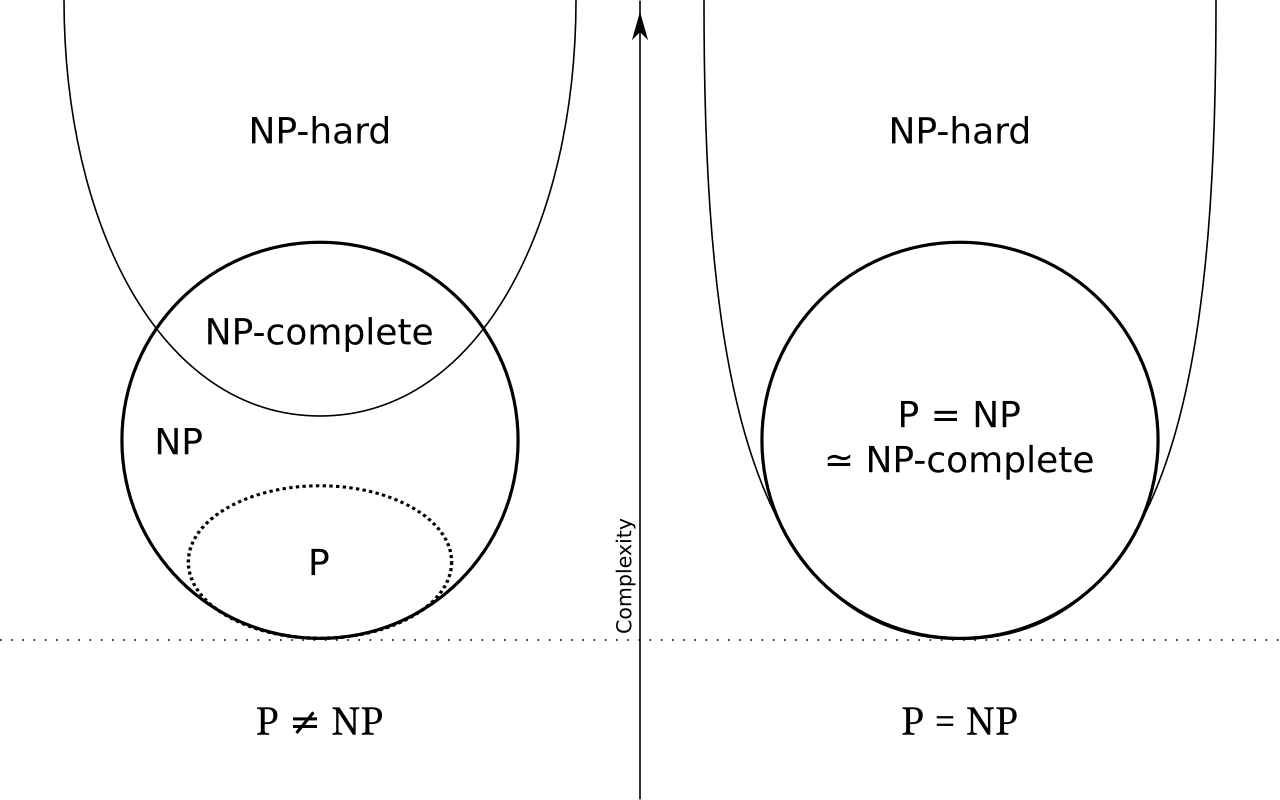
left-hand side are valid under the assumption that *P $\neq$ NP*, with the right-hand side having the assumption that *P $=$ NP*.
- **Example**) Finding the shortst path in a graph can be solved in $O(V^2)$ (*Dijkstra's algorithm*, etc.), meaning that it is a *P* problem. However, Finding a Hamiltonian cycle (simple cycle that contains each vertex $V$) in a directed graph $G(V,E)$ is an *NP* problem as verifyinf that a cycle is hamiltonian is polynomial $O(V)$. Additionally, the Hamiltonian cycle problem is an *NP-complete* problem. Furthermore, the Halting problem; determining from a description of an arbitrary computer program and an input whether the program will finish running, is an *NP-hard* problem.

**Very similar problems can have very different complexities**. A good demostration of this is the *Interval Scheduling* problem; where $1,\ldots,n$ requests require a single shared resource (more general forms can have an arbitrary number of shared resources), with each request having a start and finish times, $s(i)$ and $f(i)$ where $s(i)<f(i)$(interval of time). Two requests are compatible if they do not overlap, $f(i)\leq s(j)$ or $f(j)\leq s(i)$. The problem asks to select a compatible request subset of maximum size (schedule with the most requests)

In [23]:
# [O(n), O(n^2)] time O(n) space
function simple_interval_scheduling(requests::Vector{<:Tuple{<:Number, <:Number}}, verbose::Bool=false)
    if length(requests) ≤ 1
        return requests
    end
    sort!(requests)
    largestSubset = similar(requests, 0)
    headOfSubset = -1
    for (i, (startI, stopI)) in enumerate(requests)
        subset = similar(requests, 0)
        for (j, (startJ, stopJ)) in enumerate(requests[i+1:end]) 
            if startJ ≥ stopI
                push!(subset, (startJ, stopJ))
            end
        end
        if length(subset) > length(largestSubset)
            largestSubset = deepcopy(subset)
            headOfSubset = i
        end
    end
    verbose && println(largestSubset)
    return append!([requests[headOfSubset]], simple_interval_scheduling(largestSubset))
end 
simple_interval_scheduling([(0, 6), (1,4), (3,5), (3,8), (4,7), (5,9), (6,10), (8,11)])

3-element Vector{Tuple{Int64, Int64}}:
 (1, 4)
 (4, 7)
 (8, 11)

While the above solution solves the problem in polynomial time, there is a better method using a ***Greedy Algorithm***; a myopic procedure which does not look ahead of the current state of the problem, only looking to maximise it without regard to future processing (select element $i$ based on a simple rule $\rightarrow$ reject all elements that are incompatible with $i$ $\rightarrow$ reapeat untill all requests are processed).

Let $L=\{(s(i),f(i))\}_{i=1}^n$ where $f(i)>s(i)$ sorted by increasing $f(j)$, then, all intervals which are incompatible with $(s(1),f(1))$ are either; $s(i)\leq s(1) \cap f(i)\geq f(1)$ and $s(j)<f(1) \cap f(j)\geq f(1)$, and so are themselves incompatible with one another as $s(j)<f(i)$. Furthermore, it means that $f(1)\leq \min(f(i), f(j))$ which means that any *potential optimal* subset created using either $(s(i),f(i))$ or $(s(j),f(j))$ can also instead include $(s(1),f(1))$ with additional elements which can fit in the cap created by the use of the earliest finish time. Therefore, using this elements would potentially increase the *potential optimal subset* with elements which would have been incompatible with either $(s(i),f(i))$ or $(s(j),f(j))$ but compatible with the *potential optimal subset*. Repeating this method would generate the *optimal subset*.
-  **Proof** by *Induction* (from notes): Given the a list of intervals $L$, greedy algorithm with **earliest finish time** produces $k^*$ intervals, where $k^*$ is optimal. The base case of $k^*=1$ means that any interval is valid, and supposing the claim holds for $k^*$; then for $k^*+1$ the optimal schedule is given by $S^*[1,\ldots,k^*+1]=(s(j_1),f(j_1)),\ldots,(s(j_{k^*+1}),f(j_{k^*+1}))$ and that for some generic $k$ the greedy algorithm gives a list of intervals $S[1,\ldots,k]=(s(i_1),f(i_1)),\ldots,(s(i_k),f(i_k))$. It is true that $f(_1)\leq f(j_1)$ as th egreedy algorithm picks the earliest finish first, and so the schedule $S^{**}[1,\ldots,k^*+1]=(s(i_1),f(i_1)),\ldots,(s(j_{k^*+1}),f(j_{k^*+1}))$ as $(s(i_1),f(i_1))$ will not overlap with the interval $(s(j_2),f(j_2))$; thus this schedule is also optimal. Then, defining $L'$ as the set of itervals with $s(i)\geq f(i_1)$ and since $S^{**}$ is optimal for $L$, then $S^{**}[2,\ldots,k^*+1]$ is optimal for $L'$ of size $k^*$. Therefore, by the assumption it would mean that the greedy algorithm will produce an optimal schedule $S[2,\ldots,k^*+1]$ and therefore the new schedule $(s(i_1),f(i_1)), S[2,\ldots,k^*+1]$ generated by the greedy algorithm is optimal.

This reduces the complexity of the algorithm to $O(n\log n)$ due to the need to sort the array.

In [27]:
# O(nlogn) time O(n) space
function simple_interval_scheduling(requests::Vector{<:Tuple{<:Number, <:Number}}, verbose::Bool=false)
    if length(requests) ≤ 1
        return requests
    end
    sort!(requests, by= x->x[2])
    largestSubset = similar(requests, 0)
    for (start, stop) in requests
        if isempty(largestSubset) || start ≥ largestSubset[end][2]
            push!(largestSubset, (start, stop))
        end
    end
    return largestSubset
end
simple_interval_scheduling([(0, 6), (1,4), (3,5), (3,8), (4,7), (5,9), (6,10), (8,11)])

3-element Vector{Tuple{Int64, Int64}}:
 (1, 4)
 (4, 7)
 (8, 11)